# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [79]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [80]:
test_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q=yellowknife"
response_json = requests.get(test_url).json()

response_json

{'coord': {'lon': -114.3525, 'lat': 62.456},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 14.29,
  'feels_like': 13.79,
  'temp_min': 14.29,
  'temp_max': 14.29,
  'pressure': 1008,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 280},
 'clouds': {'all': 75},
 'dt': 1686198654,
 'sys': {'type': 1,
  'id': 1007,
  'country': 'CA',
  'sunrise': 1686131317,
  'sunset': 1686201850},
 'timezone': -21600,
 'id': 6185377,
 'name': 'Yellowknife',
 'cod': 200}

In [81]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        #print(city_lat)
        city_lng = city_weather['coord']['lon']
        #print(city_lng)
        city_max_temp = city_weather['main']['temp_max']
        #print(city_max_temp)
        city_humidity = city_weather['main']['humidity']
        #print(city_humidity)
        city_clouds = city_weather['clouds']['all']
        #print(city_clouds)
        city_wind = city_weather['wind']['speed']
        #print(city_wind)
        city_country = city_weather['sys']['country']
        #print(city_country)
        city_date = time.ctime(city_weather['dt'])[4:11] + time.ctime(city_weather['dt'])[-4:]
        print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | i-n-salah
Jun  8 2023
Processing Record 3 of Set 1 | hamilton
Jun  8 2023
Processing Record 4 of Set 1 | tafuna
Jun  8 2023
Processing Record 5 of Set 1 | tiksi
Jun  8 2023
Processing Record 6 of Set 1 | illizi
Jun  8 2023
Processing Record 7 of Set 1 | puerto natales
Jun  8 2023
Processing Record 8 of Set 1 | edinburgh of the seven seas
Jun  8 2023
Processing Record 9 of Set 1 | aasiaat
Jun  8 2023
Processing Record 10 of Set 1 | guerrero negro
Jun  8 2023
Processing Record 11 of Set 1 | dudinka
Jun  8 2023
Processing Record 12 of Set 1 | bandarbeyla
Jun  8 2023
Processing Record 13 of Set 1 | ushuaia
Jun  8 2023
Processing Record 14 of Set 1 | trashigang
Jun  8 2023
Processing Record 15 of Set 1 | west island
Jun  8 2023
Processing Record 16 of Set 1 | adamstown
Jun  8 2023
Processing Record 17 of Set 1 | borkum
Jun  8 2023
Proc

In [82]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df = city_data_df.rename(columns={"Lat": "Latitude", "Lng": "Longitude"})
# Show Record Count
city_data_df.count()

City          583
Latitude      583
Longitude     583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [83]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,i-n-salah,27.1935,2.4607,28.51,21,0,6.56,DZ,Jun 8 2023
1,hamilton,39.1834,-84.5333,16.60,61,0,1.54,US,Jun 8 2023
2,tafuna,-14.3358,-170.7200,26.97,94,100,3.09,AS,Jun 8 2023
3,tiksi,71.6872,128.8694,6.55,69,94,1.41,RU,Jun 8 2023
4,illizi,26.4833,8.4667,22.89,23,21,1.61,DZ,Jun 8 2023


In [84]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [85]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df = city_data_df.rename(columns={"Lat": "Latitude", "Lng": "Longitude"})
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,i-n-salah,27.1935,2.4607,28.51,21,0,6.56,DZ,Jun 8 2023
1,hamilton,39.1834,-84.5333,16.60,61,0,1.54,US,Jun 8 2023
2,tafuna,-14.3358,-170.7200,26.97,94,100,3.09,AS,Jun 8 2023
3,tiksi,71.6872,128.8694,6.55,69,94,1.41,RU,Jun 8 2023
4,illizi,26.4833,8.4667,22.89,23,21,1.61,DZ,Jun 8 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

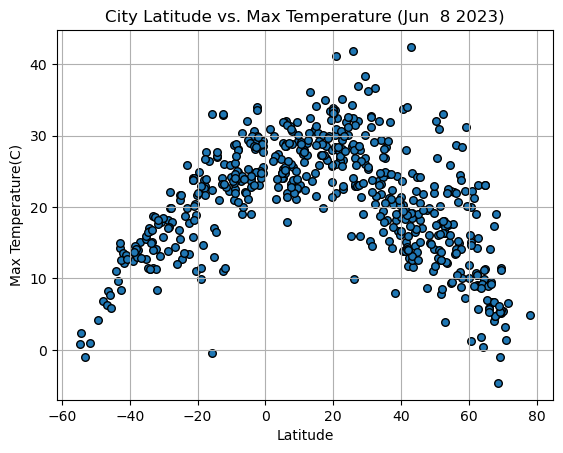

In [86]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Latitude', y='Max Temp', grid=True, edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({city_date})')
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

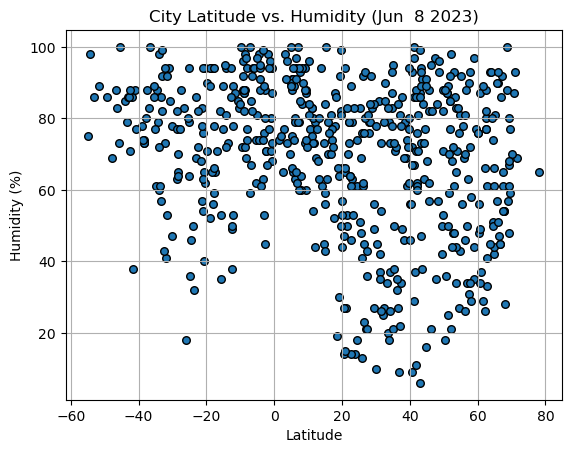

In [87]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Latitude', y='Humidity', grid=True, edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({city_date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

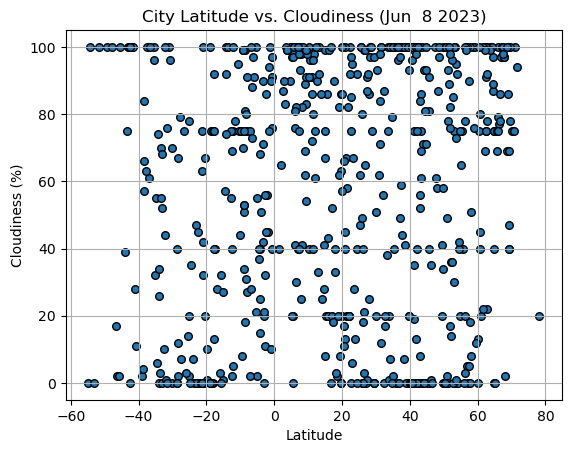

In [88]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Latitude', y='Cloudiness', grid=True, edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({city_date})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

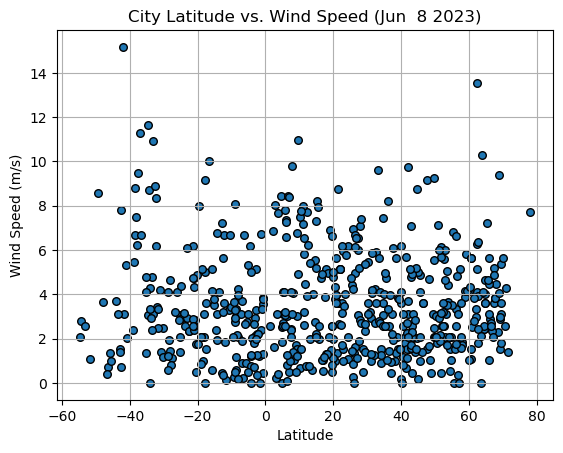

In [89]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Latitude', y='Wind Speed', grid=True, edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({city_date})')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def lin_reg (dataframe, x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dataframe[x_values], dataframe[y_values])
    regress_values = dataframe[x_values] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    dataframe.plot(kind='scatter', x=x_values, y=y_values, s=30)
    plt.plot(dataframe[x_values], regress_values, "r")
    plt.annotate(line_eq,((dataframe[x_values].max() + dataframe[x_values].min())/2,
                           dataframe[y_values].min()), fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    



In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Latitude'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,i-n-salah,27.1935,2.4607,28.51,21,0,6.56,DZ,Jun 8 2023
1,hamilton,39.1834,-84.5333,16.60,61,0,1.54,US,Jun 8 2023
3,tiksi,71.6872,128.8694,6.55,69,94,1.41,RU,Jun 8 2023
4,illizi,26.4833,8.4667,22.89,23,21,1.61,DZ,Jun 8 2023
7,aasiaat,68.7098,-52.8699,-4.64,88,69,2.32,GL,Jun 8 2023


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tafuna,-14.3358,-170.7200,26.97,94,100,3.09,AS,Jun 8 2023
5,puerto natales,-51.7236,-72.4875,0.93,89,100,1.09,CL,Jun 8 2023
6,edinburgh of the seven seas,-37.0676,-12.3116,15.10,83,61,11.30,SH,Jun 8 2023
11,ushuaia,-54.8000,-68.3000,0.81,75,0,2.06,AR,Jun 8 2023
13,west island,-12.1568,96.8225,25.99,89,75,6.69,CC,Jun 8 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7254369812888917


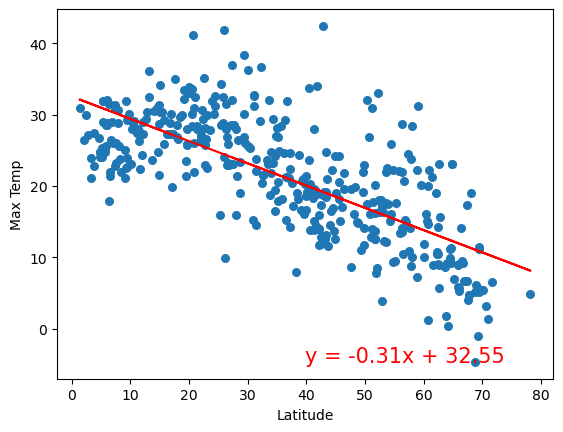

In [93]:
# Linear regression on Northern Hemisphere

lin_reg(northern_hemi_df, 'Latitude', 'Max Temp')

The r-value is: 0.811028524519339


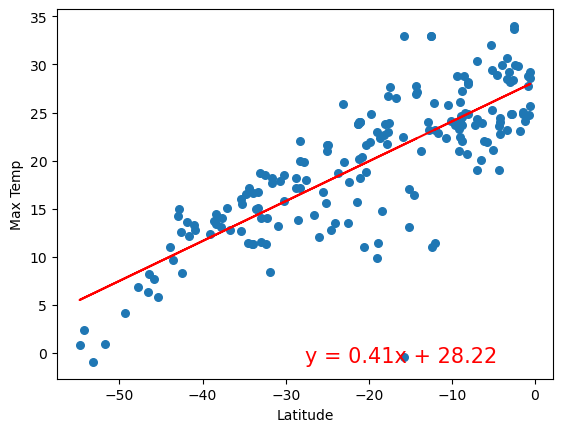

In [94]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** We can see that there is an negative correlation between latitude and temperature in the northern hemisphere and a positive correlation between latitude and temerature in the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.1302008993496132


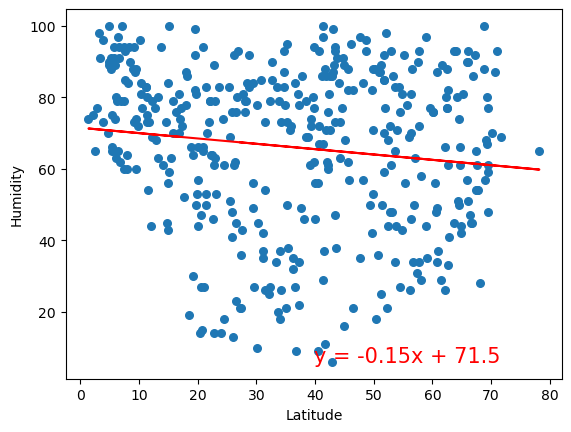

In [95]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Latitude', 'Humidity')

The r-value is: 0.04992252901861576


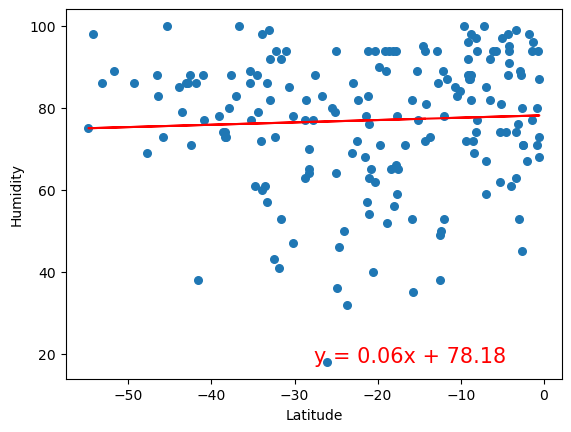

In [96]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** We notice that there does not seem to be a positive or a negative correlation between latitude and humidity in both the northern and southern hemispheres. However, humidity seems to be lower in the northern hemisphere compared to the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.027421954539168982


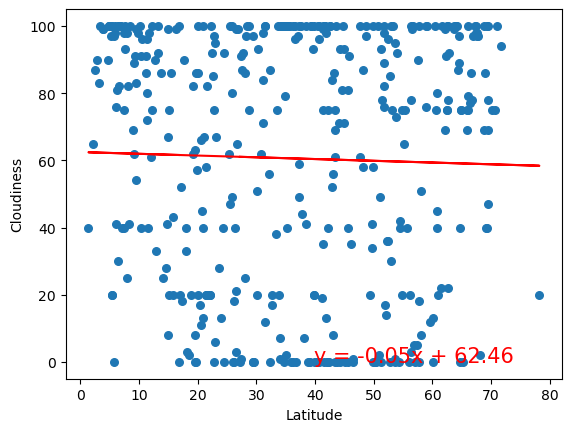

In [97]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Latitude', 'Cloudiness')

The r-value is: 0.060106154581054436


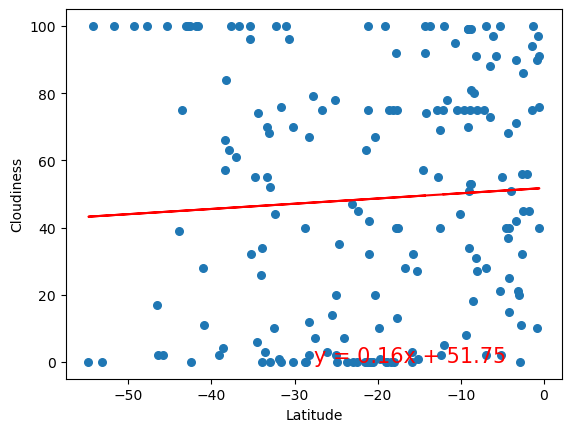

In [98]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** We can see that there is not positive or negative correlation between latitude and cloudiness in both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04080496011987499


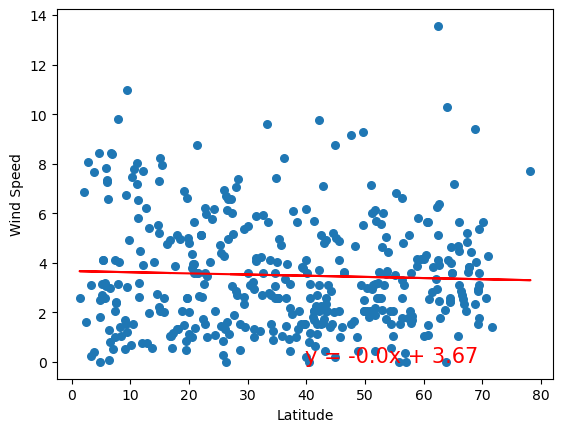

In [99]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Latitude', 'Wind Speed')

The r-value is: -0.22757623536333033


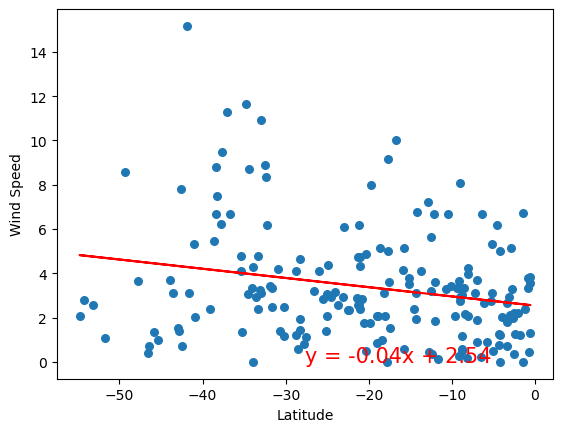

In [100]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** We can see that there is not positive or negative correlation between latitude and wind speed in both the northern and southern hemispheres.